# Python Assignment
## Boren Zheng

1. Define a function to count kmers of size k, where k is specified as an argument.

In [1]:
import pandas as pd
import plotnine as p9
import matplotlib.pyplot as plt

In [2]:
def count_okmers(seq, k):
    o_kmers = set()
    for i in range(0,len(seq)-k+1):
        o_kmers.add(''.join(seq[i:i+k]))
    return len(o_kmers)

In [3]:
def count_pkmers(seq, k):
    l = len(seq)
    if l > 4**k:
        p_kmers = 4**k
    else: p_kmers = l - k + 1
    return p_kmers
    

2. Define a function to create a pandas data frame containing all possible k and the associated
number of observed and expected kmers (see above table).

In [4]:
def frame(k_list, o_list, p_list):
    kmers_df = pd.DataFrame(
     {'k':k_list,
       'Observed kmers': o_list,
       'Possible kmers': p_list    
     }
    )
    return kmers_df

3. Define a function to produce a graph from the data frame of the proportion of each kmer
observed.

In [5]:
def plot(kmers_df):
    p = p9.ggplot(data = kmers_df,
             mapping = p9.aes(x = 'k',
                             y = 'Observed kmers')) + p9.geom_point() + \
    p9.scale_x_continuous(breaks = range(0,30))
    p.draw()

4. Define a function to calculate linguistic complexity.

In [6]:
def ling_complex(o_list, p_list):   
    complexity = sum(o_list) / sum(p_list)
    return complexity

In [7]:
def main():
    file = open("sequence.txt","r")
    data = [list(x.strip()) for x in file.readlines()]
    k = int(input('k:'))
    for i in range(0, len(data)):
        seq = data[i]
        k_list = list(range(1,len(seq)+1))
        o_list = [count_okmers(seq,x) for x in k_list]
        p_list = [count_pkmers(seq,x) for x in k_list]
        print('Sequence length:',len(seq))
        print('Observed kmers:', count_okmers(seq, k))
        print('Possible kmers:', count_pkmers(seq, k))
        kmers_df = frame(k_list, o_list, p_list)
        print(kmers_df)
        plot(kmers_df)
        print('linguistic complexity:', ling_complex(o_list,p_list))

k:3
Sequence length: 9
Observed kmers: 7
Possible kmers: 7
   k  Observed kmers  Possible kmers
0  1               3               4
1  2               5               8
2  3               7               7
3  4               6               6
4  5               5               5
5  6               4               4
6  7               3               3
7  8               2               2
8  9               1               1
linguistic complexity: 0.9
Sequence length: 13
Observed kmers: 10
Possible kmers: 11
     k  Observed kmers  Possible kmers
0    1               4               4
1    2               7              12
2    3              10              11
3    4              10              10
4    5               9               9
5    6               8               8
6    7               7               7
7    8               6               6
8    9               5               5
9   10               4               4
10  11               3               3
11  12            

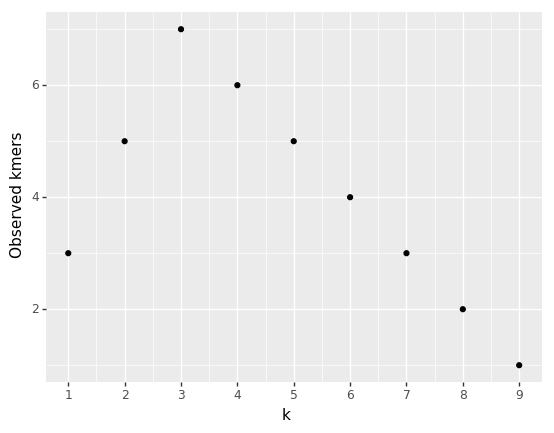

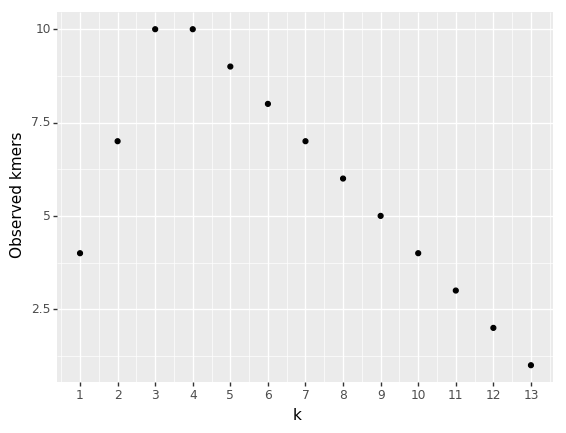

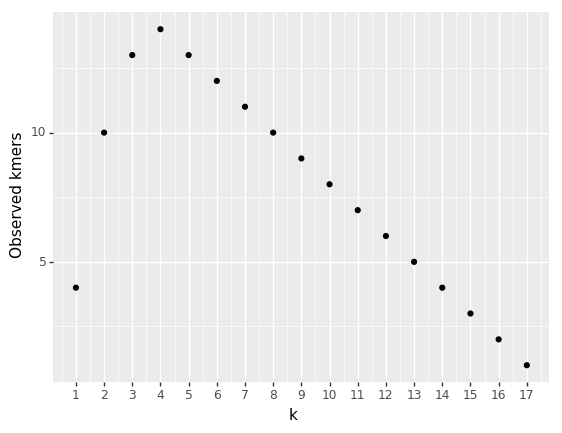

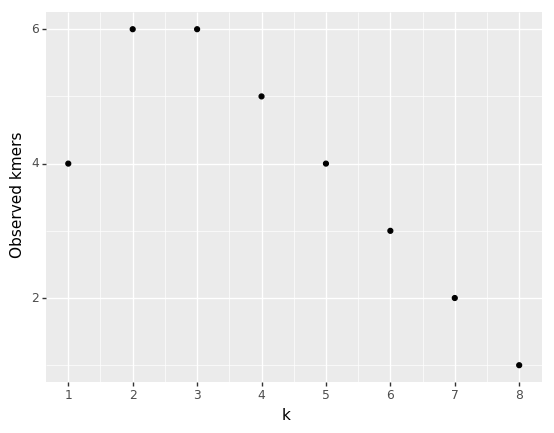

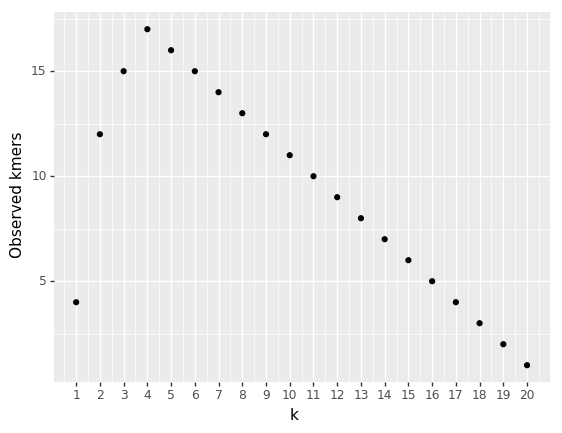

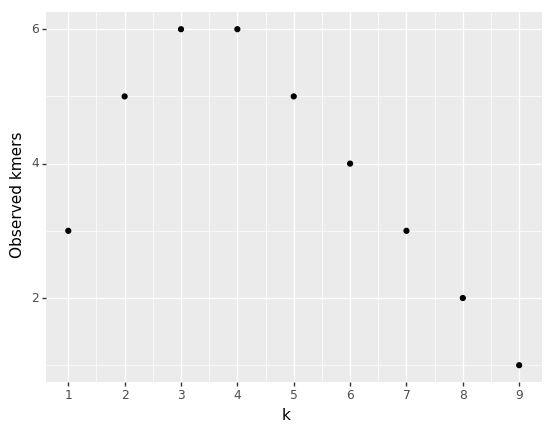

In [8]:
main()